#### Importing necessary libraries

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Let's work with listing.csv database

In [137]:
df_listings = pd.read_csv("listings.csv")

In [138]:
df_listings.head(2)

id                          listing_url       scrape_id last_scraped  \
0  241032  https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1  953595  https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   

                                 name  \
0        Stylish Queen Anne Apartment   
1  Bright & Airy Queen Anne Apartment   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   

                               neighborhood_overview        ...         \
0                                                NaN        ...          
1  Queen Anne is a wonderful, truly functional vi...        ...          

  review_scores_value requires_license license jurisdiction_names  \
0                10.0                f     NaN         WASHINGTON   
1                10.0                f     NaN         WASHINGTON   

  instant_bookable cancellation_policy  require_guest_profile_picture  \
0                f            moderate                              f   
1                f              strict                              t   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   

  reviews_per_month  
0              4.07  
1              1.48  

[2 rows x 92 columns]

Notice that the variable we wanto to predict is stored as string

In [128]:
df_listings.price.dtypes

dtype('O')

In [134]:
df_listings.price.head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

Let's do some adjustments, so we can work with price

In [132]:
def convert_to_float(df_column):
    col_to_convert = df_column.str.split(pat = '$').str[1]
    return col_to_convert.str.replace(pat = ',', repl = '').astype(float)

In [139]:
df_listings.price = convert_to_float(df_listings.price)
df_listings.cleaning_fee = convert_to_float(df_listings.cleaning_fee)
df_listings.extra_people = convert_to_float(df_listings.extra_people)
df_listings.monthly_price = convert_to_float(df_listings.monthly_price)
df_listings.weekly_price = convert_to_float(df_listings.weekly_price)

Now we can analyze some correlations with price variable

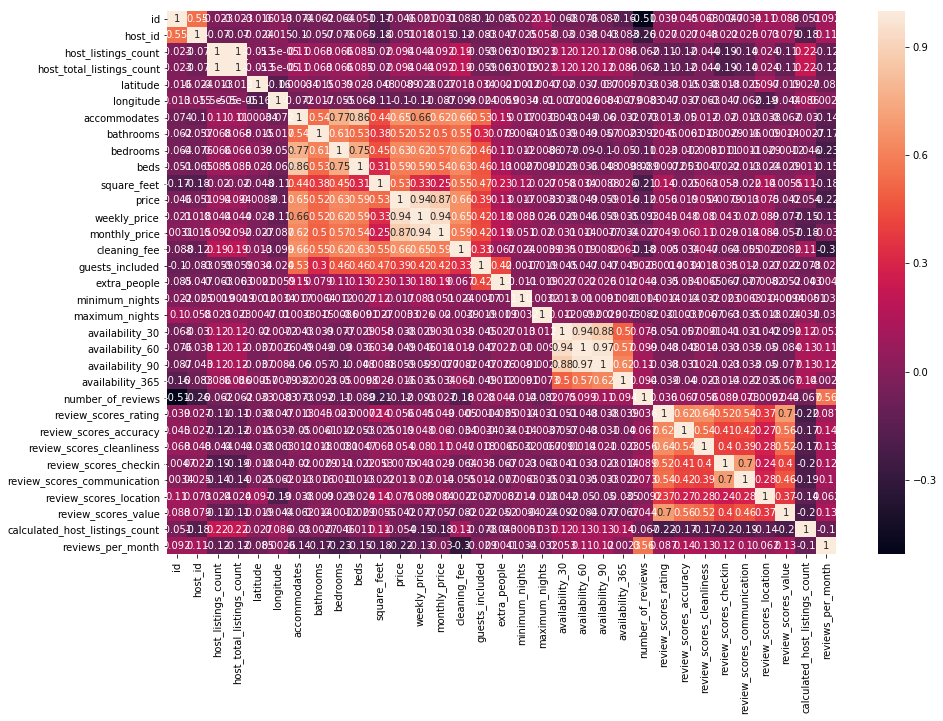

In [146]:
plt.figure(figsize=(15,10))
sns.heatmap(df_listings.drop(['scrape_id', 'license'], axis = 1).corr(), annot = True);#scrape_id and license droped because they do not correlate

From the numeric variables, it can be observed that price correlates better with accomodate, bathrooms,bedrooms, beds, square_feet and guests_included

In [150]:
numeric_var = ['accomodate', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included', 'price']

In [88]:
df_listings.price.isnull().any()

False

In [94]:
df_listings.select_dtypes(include = ['object']).columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       

For categorical variables, let's choose fewer that may have some influence on the price

In [148]:
cat_var = ['city', 'host_response_time', 'host_response_rate', 'host_is_superhost','neighbourhood','property_type',
          'room_type','bed_type']